In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from matplotlib.widgets import Slider, Button, RadioButtons



In [2]:
%matplotlib notebook

In [3]:
os.listdir()

['tests.ipynb',
 'blender_classifier.model',
 'atlas-higgs-challenge-2014-v2.csv',
 'atlas-higgs-challenge-2014.pdf',
 'classifier_1.model',
 'images',
 'classifier_0.model',
 'VizTest.ipynb',
 '__init__.py',
 '__pycache__',
 'visualization.py',
 'model.py',
 '.gitignore',
 'ensemble.py',
 'presentation.ipynb',
 '.ipynb_checkpoints',
 '.git',
 '.vscode',
 'ml-workshops',
 'prepare.py']

In [4]:
df = pd.read_csv("atlas-higgs-challenge-2014-v2.csv")

In [5]:
list(df.columns)

['EventId',
 'DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'DER_lep_eta_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_all_pt',
 'Weight',
 'Label',
 'KaggleSet',
 'KaggleWeight']

In [6]:
lepton = df[["PRI_lep_eta","PRI_lep_phi","PRI_lep_pt","Label"]]
tau = df[["PRI_tau_eta","PRI_tau_phi","PRI_tau_pt","Label"]]

In [7]:
lepton.head()

,PRI_lep_eta,PRI_lep_phi,PRI_lep_pt,Label
0,2.273,-2.414,51.626,s
1,0.501,0.103,36.918,b
2,-0.953,1.052,121.409,b
3,-0.522,-3.100,53.321,b
4,0.798,1.569,29.774,b


In [8]:
def invert_eta(eta):
    # pseudorapidity η = −ln tan(θ/2);
    theta = 2* np.arctan( np.exp(-1*eta) )
    return theta

In [9]:
def sph2cart(theta, phi, r):
    x = r * np.multiply( np.sin(phi), np.cos(theta) )
    y = r * np.multiply( np.sin(phi),np.sin(theta) )
    z = r * np.cos(phi)
    return (x, y, z)

In [10]:
#numPts = 6
startPt = np.random.randint(0,10000)
numPts = startPt+1

 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi'

In [11]:
def grab_event(df, start_row, event_type="s", particle_type="lep"):
    """
    start_row : int element of [0, df.shape[0]]
    event_type : str, {"s", "b"}
    particle_type : str, {
                        "lep", "tau", 
                        "met", "jet_leading",
                        "jet_subleading"
                        }
        lep = Lepton
        tau = Tau
        met = Missing Transverse Energy
    """
    
    _eta = "PRI_" + particle_type + "_eta"
    _phi = "PRI_" + particle_type + "_phi"
    _pt = "PRI_" + particle_type + "_pt"
    
    particle = df[df["Label"] == event_type]#[[_eta, _phi, _pt]]
    phi      = particle[_phi].values[start_row]
    theta    = invert_eta( particle[_eta].values[start_row] )
    trans_p  = particle[_pt].values[start_row]
    
    return theta, phi, trans_p 

In [12]:
def collision_plot(background, signal):
    """
    background --> ( thetaLep, phiLep, thetaTau, phiTau )
    signal     --> ( thetaLep, phiLep, thetaTau, phiTau )
    """
    thetaLep_b, phiLep_b, thetaTau_b, phiTau_b = background
    thetaLep_s, phiLep_s, thetaTau_s, phiTau_s   = signal
    
    fig1 = plt.figure(figsize=(5,5))
    ax = Axes3D(fig1)
    #ax = plt.axes(projection='3d')
    
    #ax.plot3D(xline, yline, zline, 'gray')
    
    
    xbLep, ybLep, zbLep = sph2cart(thetaLep_b, phiLep_b, 1)
    xsLep, ysLep, zsLep = sph2cart(thetaLep_s, phiLep_s, 1)
    xbTau, ybTau, zbTau = sph2cart(thetaTau_b, phiTau_b, 1)
    xsTau, ysTau, zsTau = sph2cart(thetaTau_s, phiTau_s, 1)

    
    # draw sphere
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.plot_wireframe(x, y, z, color="black",alpha=0.1)

    #ax.scatter3D(xbLep, ybLep, zbLep,c="red")#, c=z, cmap='Greens');
    #ax.scatter3D(xsLep, ysLep, zsLep,c="green")#, c=z, cmap='Greens');
    #ax.scatter3D(xbTau, ybTau, zbTau,c="Blue")#, c=z, cmap='Greens');
    #ax.scatter3D(xsTau, ysTau, zsTau,c="orange")#, c=z, cmap='Greens');

    ax.scatter3D(xbLep, zbLep, ybLep,c="red")#, c=z, cmap='Greens');
    ax.scatter3D(xsLep, zsLep, ysLep,c="blue")#, c=z, cmap='Greens');
    ax.scatter3D(xbTau, zbTau, ybTau,c="red")#, c=z, cmap='Greens');
    ax.scatter3D(xsTau, zsTau, ysTau,c="blue")#, c=z, cmap='Greens');


    #ax.plot3D([0,xbLep], [0,ybLep], [0,zbLep],label="lep b",c="red")#, c=z, cmap='Greens');
    #ax.plot3D([0,xsLep], [0,ysLep], [0,zsLep],label="lep s",c="green")#, c=z, cmap='Greens');
    #ax.plot3D([0,xbTau], [0,ybTau], [0,zbTau],label="Tau b",c="Blue")#, c=z, cmap='Greens');
    #ax.plot3D([0,xsTau], [0,ysTau], [0,zsTau],label="Tau s",c="orange")#, c=z, cmap='Greens');

    ax.plot3D([0,xbLep], [0,zbLep], [0,ybLep],label="lep b",linestyle="--",c="red")#, c=z, cmap='Greens');
    ax.plot3D([0,xsLep], [0,zsLep], [0,ysLep],label="lep s",linestyle="--",c="blue")#, c=z, cmap='Greens');
    ax.plot3D([0,xbTau], [0,zbTau], [0,ybTau],label="Tau b",c="red")#, c=z, cmap='Greens');
    ax.plot3D([0,xsTau], [0,zsTau], [0,ysTau],label="Tau s",c="blue")#, c=z, cmap='Greens');
    ax.plot3D([0,0], [-2,2], [0,0],c="black",alpha=0.3)#, c=z, cmap='Greens');
    plt.ylim(-1,1)
    
    ax.view_init(elev=25, azim=-15)
    plt.legend()
    plt.title("Lab Frame")
    #plt.show()


In [13]:
def plot_wrapper(df, event_id,ax):

    thetaLep_b, phiLep_b, _ = grab_event(df, event_id, event_type="b", particle_type="lep")
    thetaTau_b, phiTau_b, _ = grab_event(df, event_id, event_type="b", particle_type="tau")
    thetaLep_s, phiLep_s, _ = grab_event(df, event_id, event_type="s", particle_type="lep")
    thetaTau_s, phiTau_s, _ = grab_event(df, event_id, event_type="s", particle_type="tau")
    
    collision_plot( (thetaLep_b, phiLep_b, thetaTau_b, phiTau_b),
                    (thetaLep_s, phiLep_s, thetaTau_s, phiTau_s),ax
                  )    


In [14]:
#event_id = np.random.randint(0,10000)
plt.close('all')
interact(plot_wrapper, event_id=(2,40,1),df=fixed(df))

ValueError: cannot find widget or abbreviation for argument: 'ax'

In [15]:
import matplotlib
from matplotlib import animation

In [29]:
def collision_plot(background, signal,ax):
    """
    background --> ( thetaLep, phiLep, thetaTau, phiTau )
    signal     --> ( thetaLep, phiLep, thetaTau, phiTau )
    """
    thetaLep_b, phiLep_b, thetaTau_b, phiTau_b = background
    thetaLep_s, phiLep_s, thetaTau_s, phiTau_s   = signal
    
    #fig1 = plt.figure(figsize=(5,5))
    #ax = Axes3D(fig1)
    #ax = plt.axes(projection='3d')
    
    #ax.plot3D(xline, yline, zline, 'gray')
    
    
    xbLep, ybLep, zbLep = sph2cart(thetaLep_b, phiLep_b, 1)
    xsLep, ysLep, zsLep = sph2cart(thetaLep_s, phiLep_s, 1)
    xbTau, ybTau, zbTau = sph2cart(thetaTau_b, phiTau_b, 1)
    xsTau, ysTau, zsTau = sph2cart(thetaTau_s, phiTau_s, 1)

    
    # draw sphere
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.plot_wireframe(x, y, z, color="black",alpha=0.1)

    #ax.scatter3D(xbLep, ybLep, zbLep,c="red")#, c=z, cmap='Greens');
    #ax.scatter3D(xsLep, ysLep, zsLep,c="green")#, c=z, cmap='Greens');
    #ax.scatter3D(xbTau, ybTau, zbTau,c="Blue")#, c=z, cmap='Greens');
    #ax.scatter3D(xsTau, ysTau, zsTau,c="orange")#, c=z, cmap='Greens');

    ax.scatter3D(xbLep, zbLep, ybLep,c="red")#, c=z, cmap='Greens');
    ax.scatter3D(xsLep, zsLep, ysLep,c="blue")#, c=z, cmap='Greens');
    ax.scatter3D(xbTau, zbTau, ybTau,c="red")#, c=z, cmap='Greens');
    ax.scatter3D(xsTau, zsTau, ysTau,c="blue")#, c=z, cmap='Greens');


    #ax.plot3D([0,xbLep], [0,ybLep], [0,zbLep],label="lep b",c="red")#, c=z, cmap='Greens');
    #ax.plot3D([0,xsLep], [0,ysLep], [0,zsLep],label="lep s",c="green")#, c=z, cmap='Greens');
    #ax.plot3D([0,xbTau], [0,ybTau], [0,zbTau],label="Tau b",c="Blue")#, c=z, cmap='Greens');
    #ax.plot3D([0,xsTau], [0,ysTau], [0,zsTau],label="Tau s",c="orange")#, c=z, cmap='Greens');

    ax.plot3D([0,xbLep], [0,zbLep], [0,ybLep],label="lep b",linestyle="--",c="red")#, c=z, cmap='Greens');
    ax.plot3D([0,xsLep], [0,zsLep], [0,ysLep],label="lep s",linestyle="--",c="blue")#, c=z, cmap='Greens');
    ax.plot3D([0,xbTau], [0,zbTau], [0,ybTau],label="Tau b",c="red")#, c=z, cmap='Greens');
    ax.plot3D([0,xsTau], [0,zsTau], [0,ysTau],label="Tau s",c="blue")#, c=z, cmap='Greens');
    ax.plot3D([0,0], [-2,2], [0,0],c="black",alpha=0.3)#, c=z, cmap='Greens');
    plt.ylim(-1,1)
    
    #ax.view_init(elev=25, azim=-15)
    plt.legend()
    plt.title("Lab Frame")
    #plt.show()


In [30]:
ax, fig = plt.subplot(111)
interact(plot_wrapper, event_id=(2,40,1), df=fixed(df), ax=fixed(ax))

TypeError: cannot unpack non-iterable AxesSubplot object

In [17]:
dftst = pd.DataFrame( {"time":list(range(20)),
                       "x":[0]*20,
                       "y":[0]*20,
                       "z":list(range(20))} )
dftst["z"]*=0.01

In [18]:
plt.close("all")

In [19]:
b = np.array([list(np.arange(-1,0,0.05)), list(np.arange(1,0,-0.05))])

In [20]:
b.shape

(2, 20)

In [21]:
b.flatten(order="F")

array([-1.  ,  1.  , -0.95,  0.95, -0.9 ,  0.9 , -0.85,  0.85, -0.8 ,
        0.8 , -0.75,  0.75, -0.7 ,  0.7 , -0.65,  0.65, -0.6 ,  0.6 ,
       -0.55,  0.55, -0.5 ,  0.5 , -0.45,  0.45, -0.4 ,  0.4 , -0.35,
        0.35, -0.3 ,  0.3 , -0.25,  0.25, -0.2 ,  0.2 , -0.15,  0.15,
       -0.1 ,  0.1 , -0.05,  0.05])

(42,)
(42, 3)
(42,)


<IPython.core.display.Javascript object>


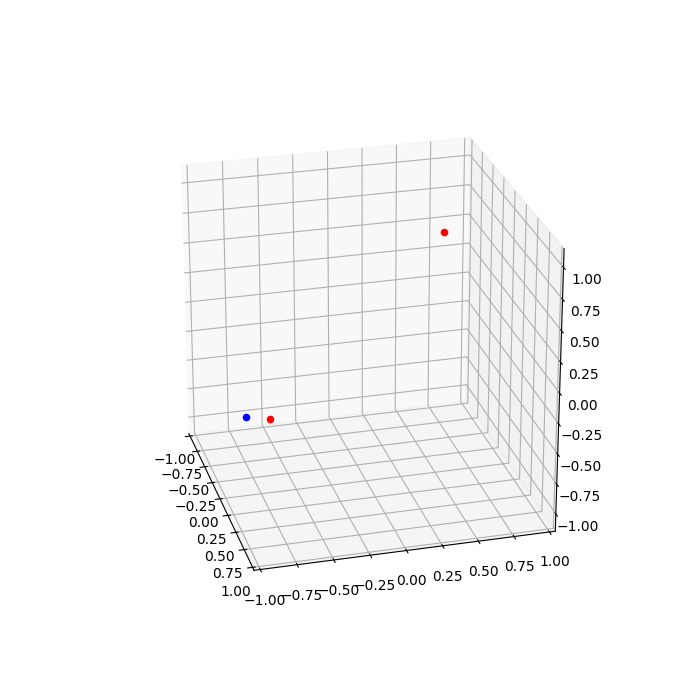

In [32]:
#a = np.random.rand(2000, 3)*1
temp = np.array([list(np.arange(-1,0.05,0.05)), list(np.arange(1,-0.05,-0.05))]).flatten(order="F")
a = np.array([[0]*42, list(temp), [0]*42 ]).T

t = np.array([np.ones(2)*i for i in range(21)]).flatten()
#df = pd.DataFrame({"time": t ,"x" : a[:,0], "y" : a[:,1], "z" : a[:,2]})
print(temp.shape)
print(a.shape)
print(t.shape)

tst = pd.DataFrame( {"time": t, "x" : a[:,0], "y":a[:,1], "z" : a[:,2]} )

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')
xtot = 0
ztot=0
def update_graph(num):
    data=tst[tst['time']==num]
    global xtot
    xtot+=1
    if xtot>21:
        #plot_wrapper(df, 101,ax)
        collision_plot((thetaLep_b, phiLep_b, thetaTau_b, phiTau_b),
                       (thetaLep_s, phiLep_s, thetaTau_s, phiTau_s), ax
                      )    
    #xtot= 0
    #ztot=0
    graph.set_data (data.x, data.y)
    graph.set_3d_properties( np.array([ztot]) )
    title.set_text('3D Test, time={}'.format(num))
    return title, graph, 

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="black",alpha=0.1)


## Get particles
event_id = 101 ############# EVENT ID CAN CHANGE
thetaLep_b, phiLep_b, _ = grab_event(df, event_id, event_type="b", particle_type="lep")
thetaTau_b, phiTau_b, _ = grab_event(df, event_id, event_type="b", particle_type="tau")
thetaLep_s, phiLep_s, _ = grab_event(df, event_id, event_type="s", particle_type="lep")
thetaTau_s, phiTau_s, _ = grab_event(df, event_id, event_type="s", particle_type="tau")


#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#title = ax.set_title('3D Test')

data=tst[tst['time']==0]
graph, = ax.plot(data.x, data.y, data.z, linestyle="", marker="o")

ani = animation.FuncAnimation(fig, update_graph, 21, 
                               interval=20, blit=True,repeat=False)
ax.view_init(elev=25, azim=-15)

#interact(plot_wrapper, event_id=(2,40,1),df=fixed(df))
#collision_plot()

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

(20, 3) (20,)


<IPython.core.display.Javascript object>


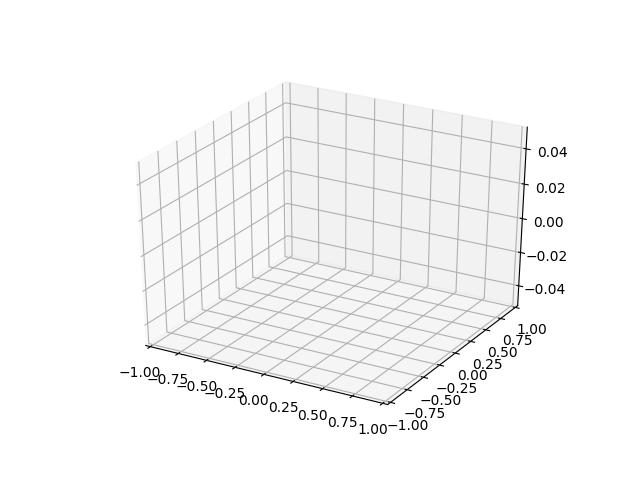

In [28]:
#a = np.random.rand(20, 3)*0.25
a = np.array( [list(range(1,21)), [0]*20, [0]*20] ).T*0.01
t = np.array([np.ones(1)*i for i in range(20)]).flatten()
print(a.shape, t.shape)
df2 = pd.DataFrame({"time": t ,"x" : a[:,0], "y" : a[:,1], "z" : a[:,2]})

def update_graph(num):
    data=df2[df2['time']==num]
    graph.set_data (data.x, data.y)
    graph.set_3d_properties(data.z)
    title.set_text('3D Test, time={}'.format(num))
    return title, graph, 




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')

data=df2[df2['time']==0]
graph, = ax.plot(data.x, data.y, data.z, linestyle="", marker="o")

ani = animation.FuncAnimation(fig, update_graph, 19, 
                               interval=20, blit=True)
plt.xlim(-1,1)
plt.ylim(-1,1)
#plt.zlim(-1,1)
plt.show()